In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


In [3]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df.iloc[:, :-1].values  # first 4 columns
y = df.iloc[:, -1].values   # species column

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Standardize features

In [9]:
y = tf.keras.utils.to_categorical(y, 3) # One-hot encode

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(4,)))  # 10 neurons, Input + Hidden Layer


model.add(Dense(3, activation='softmax'))  # 3 output classes, Output Layer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)  # train the model

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.1471 - loss: 1.4281 - val_accuracy: 0.2500 - val_loss: 1.2923
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1693 - loss: 1.4152 - val_accuracy: 0.2500 - val_loss: 1.2677
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1862 - loss: 1.3701 - val_accuracy: 0.2917 - val_loss: 1.2444
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1484 - loss: 1.3932 - val_accuracy: 0.3333 - val_loss: 1.2219
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2109 - loss: 1.3102 - val_accuracy: 0.3333 - val_loss: 1.1999
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1940 - loss: 1.3217 - val_accuracy: 0.3333 - val_loss: 1.1782
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2057 - loss: 1.2776 - val_accuracy: 0.3333 - val_loss: 1.1575
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1992 - loss: 1.2784 - val_accuracy: 0.3333 - val_loss

In [11]:
train_loss, train_acc = model.evaluate(X_train, y_train)  #accuracy of train dataset
print("Train Accuracy:", train_acc)

test_loss, test_acc = model.evaluate(X_test, y_test) #accuracy on test set
print("Test Accuracy:", test_acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8525 - loss: 0.4567 
Train Accuracy: 0.8500000238418579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9000 - loss: 0.4262
Test Accuracy: 0.8999999761581421


In [12]:
y_pred_probs = model.predict(X_test)        #predict
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


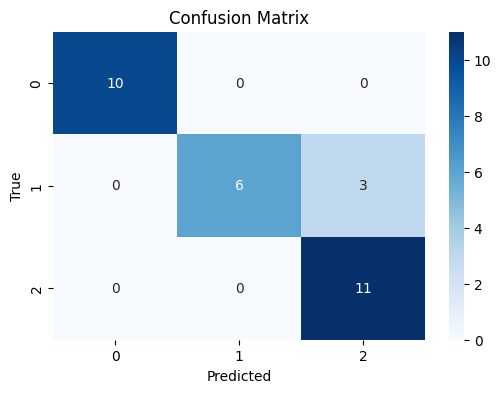

In [13]:
cm = confusion_matrix(y_true, y_pred)      #confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [14]:

print("Classification Report:\n", classification_report(y_true, y_pred))  #classification Report


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



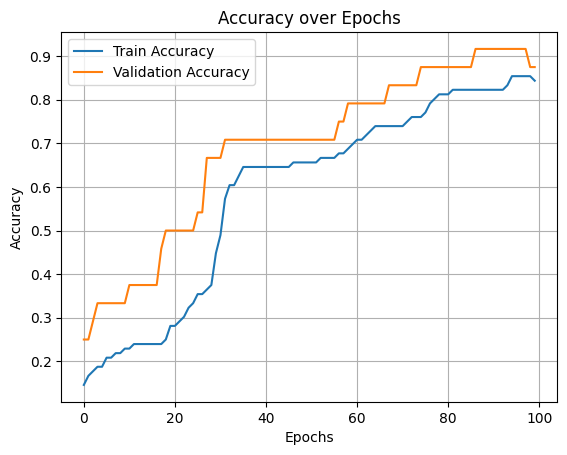

In [15]:
#plot of accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

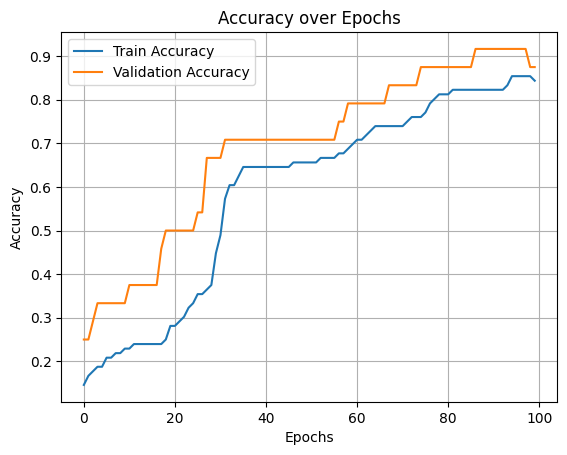

In [16]:
#plot of loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()